In [1]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import instruments as inst
import numpy as np
import json

# Step 1: Setting up initial information

In [2]:
# Data path for processed csv
file_path = custom_module_path + "/20230914_processed_table.csv"
wavelengths = ["625-50", 610, "675-50", 670, "725-50", 720, "750-50", 760, 
    "775-50"]
obs_modes = ["IPOL", "MBI", "IPOL", "MBI", "IPOL", "MBI", "IPOL", "MBI", "IPOL"]
previous_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/initial/"
save_fits_directory = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/"
em_gains = [1.139634, 1.230573943788524, 1.177732, 1.1946169522853136, 1.184177, 
    1.1968557857131294, 1.180120, 1.0798052820150867, 1.190700]
bounds = [ 
    (0, 2 * np.pi), # dichroic_retardance
    (0, 1), # dichroic_diattenuation
    (-90, 90), # dichroic_rotation_angle 
    (0.4 * 2 * np.pi, 0.6 * 2 * np.pi),  # delta_FLC
    (-5, 5),  # rot_FLC
    (0, 2 * np.pi),  # delta_opts
    (0, 1),  # epsilon_opts
    (-90, 90),  # rot_opts
    (0, 2 * np.pi),  # delta_derot
    (0, 2 * np.pi),  # delta_HWP
    (-5, 5),  # offset_HWP
    (-5, 5),  # theta_pol
]

# Step 2: Performing fits iteratively by wavelength - first broadband then MBI

{'dichroic': {'phi': 0.30872304463963207, 'epsilon': 0.010945621474919988, 'theta': 1.8315213575483158}, 'flc': {'phi': 3.318462559843585, 'delta_theta': 1.798029718547543}, 'optics': {'phi': -0.8083964583195624, 'epsilon': 0.013895280106864007, 'theta': 18.01712022177098}, 'image_rotator': {'phi': 1.365065666004961}, 'hwp': {'phi': 2.752521179595714, 'delta_theta': -1.9748257333612886}, 'lp': {'theta': -0.15074376412465285}}
[[ 0.52796105  0.52795374 -0.00277809  0.        ]
 [ 0.52796105  0.52795374 -0.00277809  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
logl value: 4937.559569466054


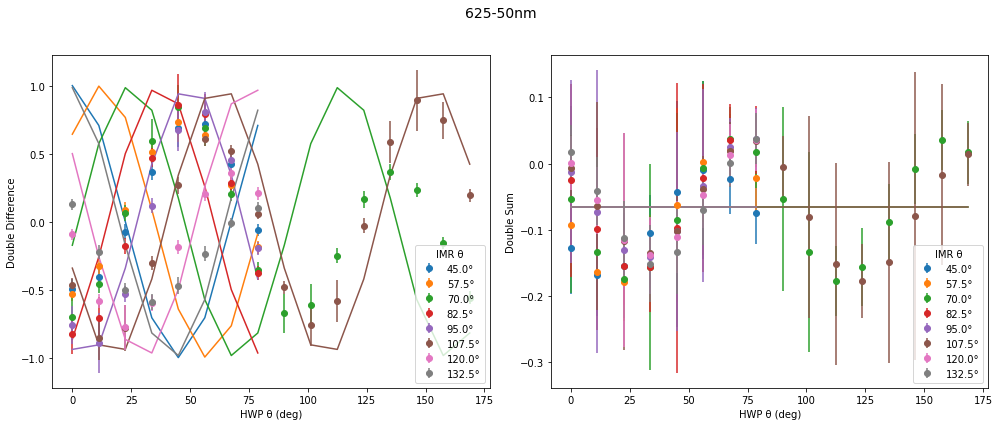

Before p0: {'dichroic': {'phi': 0.0001, 'epsilon': 0.0001, 'theta': 0}, 'flc': {'phi': 3.141592653589793, 'delta_theta': 0}, 'optics': {'phi': 0.0001, 'epsilon': 0.0001, 'theta': 0}, 'image_rotator': {'phi': 3.141592653589793}, 'hwp': {'phi': 3.141592653589793, 'delta_theta': 0}, 'lp': {'theta': 0}}
Iteration #: 1
logl_value: 49.01812228218715
Best Fit Parameters: [  0.04107589   0.         -12.34148663   2.97809975   1.62820686
   0.87407878   0.09960181  15.68866074   4.88903752   3.48444209
  -4.95653741  -4.74731089]


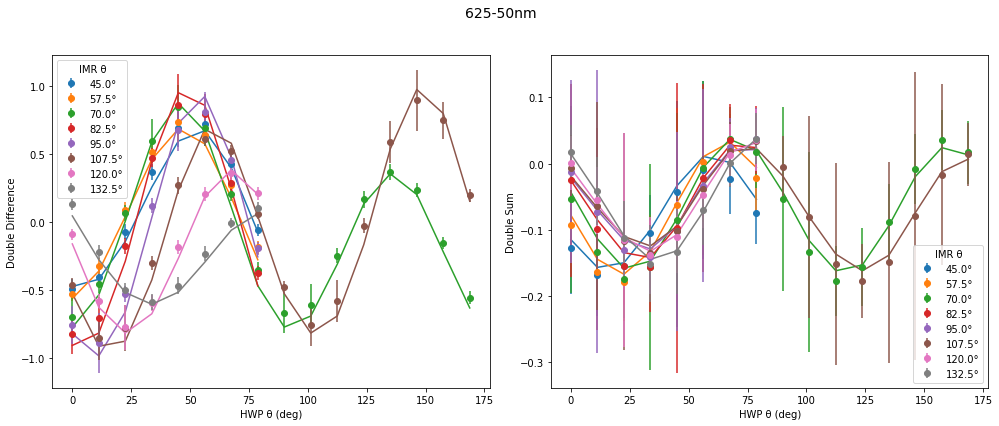

After p0: {'dichroic': {'phi': 0.04107588660187996, 'epsilon': 0.0, 'theta': -12.341486634212915}, 'flc': {'phi': 2.9780997505277567, 'delta_theta': 1.6282068551802737}, 'optics': {'phi': 0.8740787805970445, 'epsilon': 0.09960181332818738, 'theta': 15.688660735931961}, 'image_rotator': {'phi': 4.889037523167058}, 'hwp': {'phi': 3.4844420942437013, 'delta_theta': -4.956537411042875}, 'lp': {'theta': -4.747310885780535}}
Before p0: {'dichroic': {'phi': 0.04107588660187996, 'epsilon': 0.0, 'theta': -12.341486634212915}, 'flc': {'phi': 2.9780997505277567, 'delta_theta': 1.6282068551802737}, 'optics': {'phi': 0.8740787805970445, 'epsilon': 0.09960181332818738, 'theta': 15.688660735931961}, 'image_rotator': {'phi': 4.889037523167058}, 'hwp': {'phi': 3.4844420942437013, 'delta_theta': -4.956537411042875}, 'lp': {'theta': -4.747310885780535}}
Iteration #: 2
logl_value: 10.624663341975925
Best Fit Parameters: [ 1.74969595e-01  8.45566682e-03 -3.10378522e+01  3.22088374e+00
  1.07653586e+00  6.9

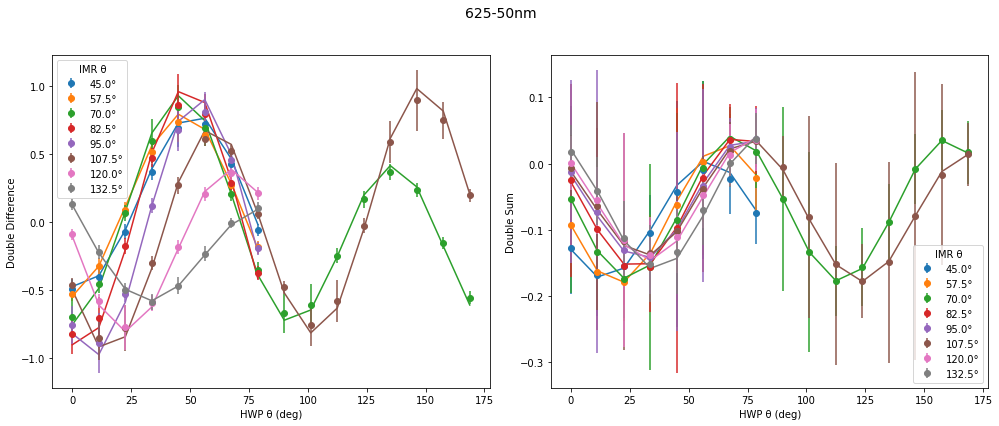

After p0: {'dichroic': {'phi': 0.17496959536408618, 'epsilon': 0.00845566682449888, 'theta': -31.037852244862137}, 'flc': {'phi': 3.2208837413350278, 'delta_theta': 1.0765358571721548}, 'optics': {'phi': 0.6993496990838881, 'epsilon': 0.014513499217107907, 'theta': 14.65580964020679}, 'image_rotator': {'phi': 4.917437959616562}, 'hwp': {'phi': 3.5285999020748573, 'delta_theta': -1.9295498639468014}, 'lp': {'theta': -0.0584373774769015}}
Before p0: {'dichroic': {'phi': 0.17496959536408618, 'epsilon': 0.00845566682449888, 'theta': -31.037852244862137}, 'flc': {'phi': 3.2208837413350278, 'delta_theta': 1.0765358571721548}, 'optics': {'phi': 0.6993496990838881, 'epsilon': 0.014513499217107907, 'theta': 14.65580964020679}, 'image_rotator': {'phi': 4.917437959616562}, 'hwp': {'phi': 3.5285999020748573, 'delta_theta': -1.9295498639468014}, 'lp': {'theta': -0.0584373774769015}}


In [3]:
# Defining wavelength
for i, wavelength in enumerate(wavelengths):
    interleaved_values, interleaved_stds, configuration_list = inst.read_csv(file_path, 
        obs_mode = obs_modes[i], obs_filter = wavelength)

    if obs_modes[i] == "IPOL":
        filename = previous_fits_directory + wavelength + "nm.txt"

    # Using closest broadband files    
    with open(filename, "r") as f:
        past_fit = json.load(f)
    print(past_fit)

    theta_pol = past_fit["lp"]["theta"]
    delta_HWP = past_fit["hwp"]["phi"] 
    offset_HWP = past_fit["hwp"]["delta_theta"]
    delta_derot = past_fit["image_rotator"]["phi"] 
    delta_opts = past_fit["optics"]["phi"]
    epsilon_opts = past_fit["optics"]["epsilon"]
    rot_opts = past_fit["optics"]["theta"]
    delta_dichroic = past_fit["dichroic"]["phi"]
    epsilon_dichroic = past_fit["dichroic"]["epsilon"]
    rot_dichroic = past_fit["dichroic"]["theta"]
    delta_FLC = past_fit["flc"]["phi"] 
    rot_FLC = past_fit["flc"]["delta_theta"]
    em_gain = em_gains[i] # from EM gain measurements

    # NOTE: Components must be listed downstream to upstream
    # Define the instrument configuration as a system dictionary
    system_dict = {
        "components": {
            "wollaston": {
                "type": "wollaston_prism_function",
                "properties": {"beam": "o", "transmission_ratio": em_gain},
            },
            "dichroic": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': delta_dichroic, 
                    'epsilon': epsilon_dichroic, 'theta': rot_dichroic},
            },
            "flc": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_FLC, "theta": 0, "delta_theta": rot_FLC},
            },
            "optics": {
                "type": "diattenuator_retarder_function",
                "properties": {'phi': 2 * np.pi * delta_opts, 
                    'epsilon': epsilon_opts, 'theta': rot_opts},
            },
            "image_rotator": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_derot, "theta": 0, "delta_theta": 0},
            },
            "hwp": {
                "type": "general_retarder_function",
                "properties": {"phi": 2 * np.pi * delta_HWP, "theta": 0, "delta_theta": offset_HWP},
            },
            "lp": {
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"theta": theta_pol},
            },
        }
    }

    # Turn dictionary into matrix
    system_mm = inst.generate_system_mueller_matrix(system_dict)
    print(system_mm.evaluate())

    # Set-up for p0
    p0 = {
    # "wollaston": {"transmission_ratio": em_gain}, 
    "dichroic": {"phi": 0.0001, 
                 "epsilon": 0.0001, 
                 "theta": 0},
    "flc": {"phi": np.pi, "delta_theta": 0},
    "optics": {"phi": 0.0001, "epsilon": 0.0001, "theta": 0},
    "image_rotator": {
                    "phi": np.pi, 
                    # "delta_theta": 0
                    },
    "hwp": {"phi": np.pi, "delta_theta": 0},
    "lp": {"theta": 0}
    }

    # Adding p0
    p0_values, p0_keywords = inst.parse_configuration(p0)
    s_in = np.array([1, 0, 0, 0])
    logl_value = inst.logl(p0_values, p0_keywords, system_mm, interleaved_values, interleaved_stds, configuration_list,
        s_in=s_in, logl_function=None, process_dataset=inst.process_dataset, process_errors=inst.process_errors, 
        process_model=inst.process_model)
    print("logl value: " + str(logl_value))

    # Plotting intial plot
    updated_system_mm = inst.update_system_mm(p0_values, p0_keywords, system_mm)
    model = inst.model(p0_values, p0_keywords, system_mm, configuration_list, 
        process_model = inst.process_model)

    inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
        configuration_list, wavelength = wavelength)

    # Iterative Fitting
    # Unpolarized light for s_in as there is LP in the system already
    s_in = np.array([1, 0, 0, 0])

    # Counters for iterative fitting
    iteration = 1
    previous_logl_value = 1000000
    new_logl_value = 0

    while abs(previous_logl_value - new_logl_value) > 0.01 * abs(previous_logl_value):
        print("Before p0: " + str(p0))
        if iteration > 1: 
            previous_logl_value = new_logl_value
        result, new_logl_value = inst.minimize_system_mueller_matrix(p0, system_mm, 
            interleaved_values, interleaved_stds, configuration_list, s_in = s_in,
            process_dataset = inst.process_dataset, 
            process_errors = inst.process_errors, 
            process_model = inst.process_model, bounds = bounds)
        
        # Print statements
        print("Iteration #: " + str(iteration))
        print("logl_value: " + str(new_logl_value))
        print("Best Fit Parameters: " + str(result.x))

        # Making a plot
        updated_system_mm = inst.update_system_mm(result.x, p0_keywords, system_mm)
        model = inst.model(result.x, p0_keywords, updated_system_mm, configuration_list, 
        process_model = inst.process_model)

        save_path = save_fits_directory + str(wavelength) + "nm_no_IMR_offset_or_IMR_and_HWP_constraints_ideal_start.png"
        inst.plot_data_and_model(interleaved_values, interleaved_stds, model, 
            configuration_list, wavelength = wavelength, save_path = save_path)

        # Updating p0 for next time
        inst.update_p0(p0, result.x)
        print("After p0: " + str(p0))

        iteration += 1

        filename = save_fits_directory + str(wavelength) + "nm_no_IMR_offset_or_IMR_and_HWP_constraints_ideal_start.txt"
        with open(filename, 'w') as f:
            json.dump(p0, f, indent=4)